# Importando as Bibliotecas

In [1]:
# 
import pandas as pd
import numpy as np
# Visualização 
import seaborn as sns
import matplotlib.pyplot as plt
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# 
from sklearn.model_selection import train_test_split
# Metricas de validação
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error  

# DataFrame

In [2]:
df = pd.read_csv('../1_bases_originais/HousePrices_HalfMil.csv', sep=';')
df.head(3)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0


## Caracteristicas do DF

In [3]:
print(f'No nosso DataFrame temos {df.shape[0]} registros e {df.shape[1]} colunas.')
print()
print()
display(df.info())

No nosso DataFrame temos 1000 registros e 7 colunas.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   precos     1000 non-null   int64
 1   area       1000 non-null   int64
 2   garagem    1000 non-null   int64
 3   banheiros  1000 non-null   int64
 4   lareira    1000 non-null   int64
 5   marmore    1000 non-null   int64
 6   andares    1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


None

## Analise do DF

In [4]:
# Padronizando os Nomes das Colunas
dic_nome = {
    'precos' : 'preco'
    ,'banheiros' : 'banheiro'
    ,'andares' : 'andar'
}
df.rename(columns=dic_nome, inplace=True)

---

In [5]:
# Analise de Dados Nulos
df.isnull().sum()

preco       0
area        0
garagem     0
banheiro    0
lareira     0
marmore     0
andar       0
dtype: int64

---

In [6]:
# Analise e Tratamento de Dados Duplicados
tamanho_ori = len(df)
df.drop_duplicates(inplace=True)
tamanho_drop = len(df)

if tamanho_drop == tamanho_ori:
    print('Não há dados duplicados')
else:
    print('Havia dados duplicados no nosso DataFrame')
    print(f'Agora temos {df.shape[0]} registros.')

Não há dados duplicados


---

In [7]:
#--------------------------------------------------------
#-----------------------Infomações-----------------------
## Essa "função" analisa se há outliers nas colunas passadas
## informando a quantidade de outliers em cada limite e o
## tratamento é feito com o valor da mediana.
#--------------------------------------------------------
#-----------------------Parametros-----------------------
# col = []
# df_analisado = df[[col]]        
df_analisado = df             # df -> DataFrame
msg=True                      # msg -> Print com as informações (True/False)
tratamento=False              # tratamento -> (True/False) 
#--------------------------------------------------------
#--------------------------------------------------------

flag = 0
for col in list(df_analisado.columns):
    # Definindo os outliers
    Q1 = int(df_analisado.quantile([0.25])[col])
    Q3 = int(df_analisado.quantile([0.75])[col])
    IIQ = Q3 - Q1
    ls = Q3 + (1.5*IIQ)
    li = Q1 - (1.5*IIQ)
    outlier_sup = df_analisado.query(f'{col} > {ls}')[col]
    outlier_inf = df_analisado.query(f'{col} < {li}')[col]
    # Verificando
    if len(outlier_sup) > 0:
        if msg == True:
            flag = 1
            print(f'A coluna "{col}" possui {len(outlier_sup)} outliers no limite superior')
        if tratamento == True:
            df[df[col] == outlier_sup][col].replace(to_replace=df[col].median(), inplace=True)
            print('Os outliers foram tratados.')
    if len(outlier_inf) > 0:
        if msg == True:
            flag = 1
            print(f'A coluna "{col}" possui {len(outlier_inf)} outliers no limite inferior')
        if tratamento == True:
            df[df[col] == outlier_inf][col].replace(to_replace=df[col].median(), inplace=True)
            print('Os outliers foram tratados.')
    if len(outlier_inf) > 0 or len(outlier_sup) > 0:
        print('------------------------------------------------------------')
#     
if msg == True:
    if flag == 0:
        print('Não foi encontrado outliers em nenhuma das colunas')

Não foi encontrado outliers em nenhuma das colunas


# Analise Exploratoria dos Dados

In [8]:
df.head(3)

,preco,area,garagem,banheiro,lareira,marmore,andar
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0


- Colunas com valores continuos: 'preco' e 'area'.
- Colunas com classes ordenadas: 'garagem', 'banheiro' e 'lareira'.
- Colunas com valores binarios: 'marmore' e 'andar'.

## Analise Descritiva

In [9]:
df.describe()

,preco,area,garagem,banheiro,lareira,marmore,andar
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41985.600000,124.326000,2.009000,3.000000,2.034000,0.331000,0.485000
std,12140.385408,72.389972,0.813376,1.429701,1.418752,0.470809,0.500025
min,13150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33112.500000,60.750000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,41725.000000,123.000000,2.000000,3.000000,2.000000,0.000000,0.000000
75%,51175.000000,187.000000,3.000000,4.000000,3.000000,1.000000,1.000000
max,73675.000000,249.000000,3.000000,5.000000,4.000000,1.000000,1.000000


<h3>Preço</h3>
<p>- A coluna "preco" possui uma <strong>média de 41985.60</strong></p>
<p>- Os valores se <strong>desviam 12140.39</strong> da média</p>
<p>- E o <strong>valor central</strong> dessa variavel é de <strong>41725.00.</strong></p>
</p>
<h3>Area</h3>
<p>- A coluna "area" possui uma <strong>média de 124.33</strong></p>
<p>- Os valores se <strong>desviam 72.39</strong> da média</p>
<p>- E o <strong>valor central</strong> dessa variavel é de <strong>123.00.</strong></p>
<h3>Garagem</h3>
<p>- A coluna "garagem" possui uma <strong>média de 2.01</strong></p>
<p>- Os valores se <strong>desviam 0.81</strong> da média</p>
<p>- E o <strong>valor central</strong> dessa variavel é de <strong>2.00.</strong></p>
<h3>Banheiro</h3>
<p>- A coluna "banheiro" possui uma <strong>média de 3.00</strong></p>
<p>- Os valores se <strong>desviam 1.43</strong> da média</p>
<p>- E o <strong>valor central</strong> dessa variavel é de <strong>3.00.</strong></p>
<h3>Lareira</h3>
<p>- A coluna "lareira" possui uma <strong>média de 2.03</strong></p>
<p>- Os valores se <strong>desviam 1.42</strong> da média</p>
<p>- E o <strong>valor central</strong> dessa variavel é de<strong> 2.00.</strong></p>
<h3>Marmore</h3>
<p>- A coluna "marmore" possui uma <strong>média de 0.33</strong></p>
<p>- Os valores se <strong>desviam 0.47</strong> da média</p>
<p>- E o <strong>valor central</strong> dessa variavel é de <strong>0.00.</strong></p>
<h3>Andar</h3>
<p>- A coluna "andar" possui uma <strong>média de 0.48</strong></p>
<p>- Os valores se <strong>desviam 0.50</strong> da média</p>
<p>- E o <strong>valor central</strong> dessa variavel é de <strong>0.00.</strong></p>

---

In [10]:
print('A diferença entre média e a mediana por coluna:')
for col in ['preco', 'area', 'garagem', 'banheiro', 'lareira']    :
    print(f' * {col}:', abs(df[col].mean() - df[col].quantile(0.5)).round(2))

A diferença entre média e a mediana por coluna:
 * preco: 260.6
 * area: 1.33
 * garagem: 0.01
 * banheiro: 0.0
 * lareira: 0.03


- Possuimos um Dataframe com os dados bem simétricos. Ideal para a aplicação da regressão linear.

## Analise de Frequencia

### Preço

<AxesSubplot:>

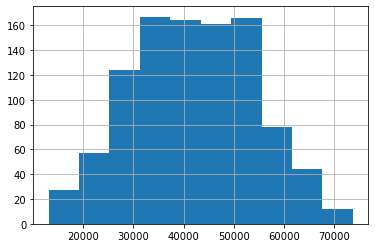

In [11]:
df['preco'].hist()

- Nossa variavel resposta é uma distribuição normal

---

### Area

<AxesSubplot:>

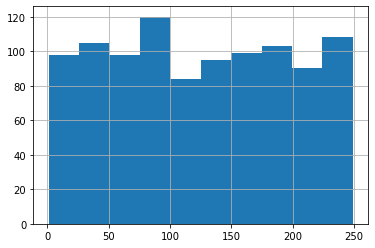

In [12]:
df['area'].hist()

- Dados uniformes

---

### Garagem

<AxesSubplot:>

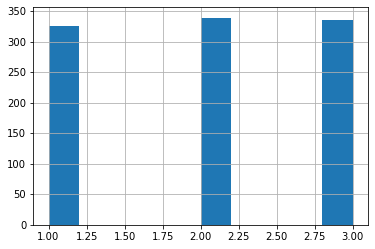

In [13]:
df['garagem'].hist()

- Dados uniformes

---

### Banheiro

<AxesSubplot:>

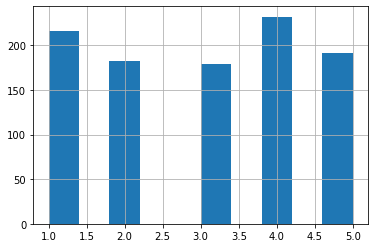

In [14]:
df['banheiro'].hist()

- Variação de frequências nas classes.

---

### Lareira

<AxesSubplot:>

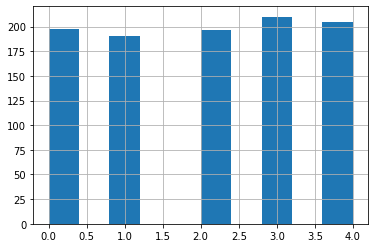

In [15]:
df['lareira'].hist()

- Dados uniformes

---

### Marmore

<AxesSubplot:>

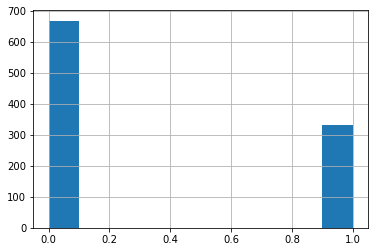

In [16]:
df['marmore'].hist()

In [17]:
marmore = len(df.query('marmore == 0')) * 100 /  len(df)
print(f'{marmore:.2f}% das casas não tem marmore e {(abs(100-marmore)):.2f}% tem marmore')

66.90% das casas não tem marmore e 33.10% tem marmore


---

### Andar

<AxesSubplot:>

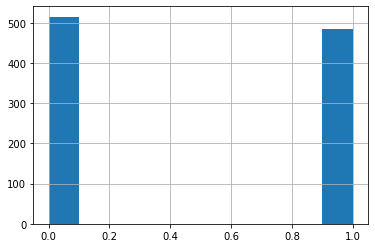

In [18]:
df['andar'].hist()

In [19]:
andar_zero = len(df.query('andar == 0')) * 100 /  len(df)
print(f'{andar_zero:.2f}% das casas não tem mais de um andar e {(abs(100-andar_zero)):.2f}% tem mais de um andar')

51.50% das casas não tem mais de um andar e 48.50% tem mais de um andar


## Correlação

<AxesSubplot:>

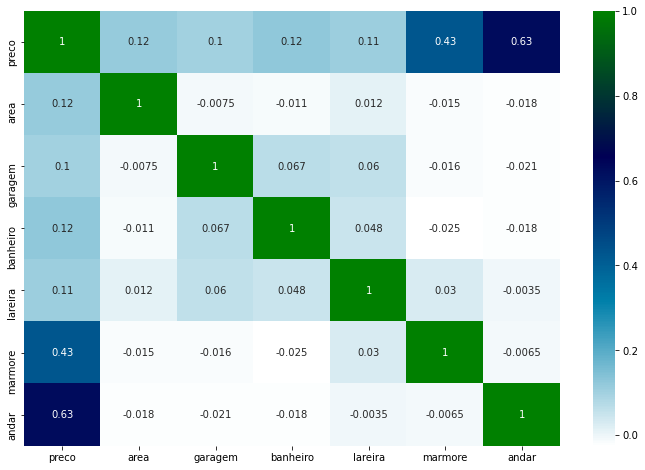

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='ocean_r')

- Há uma alta correlação entre 'preco' e as nossas variaveis binarias.

# Identificando os Padrões

## Andar

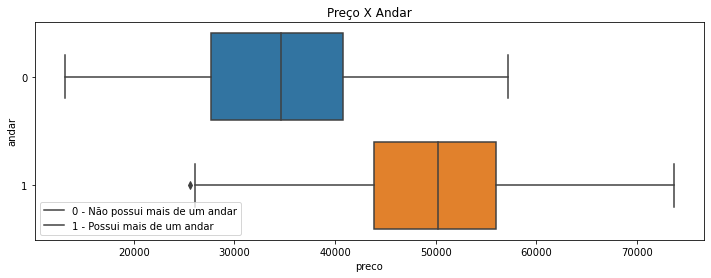

In [21]:
ax = sns.boxplot(x='preco', y='andar', data=df, orient='h')
ax.set_title('Preço X Andar')
ax.legend(['0 - Não possui mais de um andar', '1 - Possui mais de um andar'], loc=3)
ax.figure.set_size_inches(12, 4)
plt.show()

In [22]:
aumento_med = df.query('andar == 1')['preco'].mean() - df.query('andar == 0')['preco'].mean()
print(f'Quando temos andares na casa observamos um aumento médio no preço de {aumento_med:.2f}')

Quando temos andares na casa observamos um aumento médio no preço de 15333.24


## Marmore

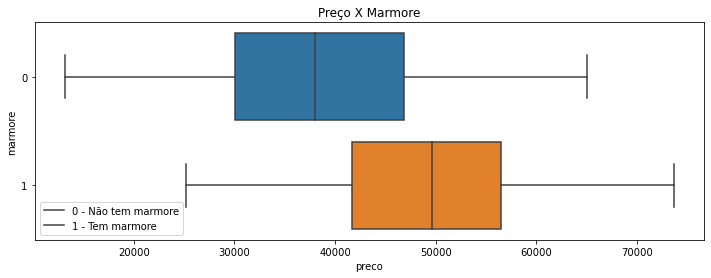

In [23]:
ax = sns.boxplot(x='preco', y='marmore', data=df, orient='h')
ax.set_title('Preço X Marmore')
ax.legend(['0 - Não tem marmore', '1 - Tem marmore'])
ax.figure.set_size_inches(12, 4)
plt.show()

In [24]:
aumento_med = df.query('marmore == 1')['preco'].mean() - df.query('marmore == 0')['preco'].mean()
print(f'Quando temos marmore na casa observamos um aumento médio no preço de {aumento_med:.2f}')

Quando temos marmore na casa observamos um aumento médio no preço de 11107.87


## Area

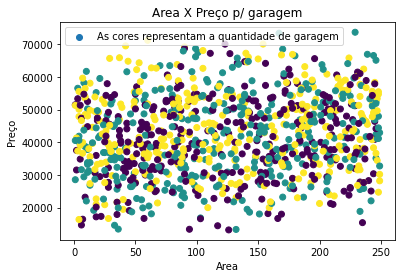

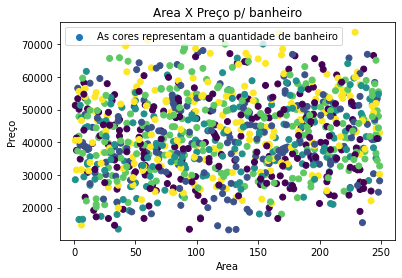

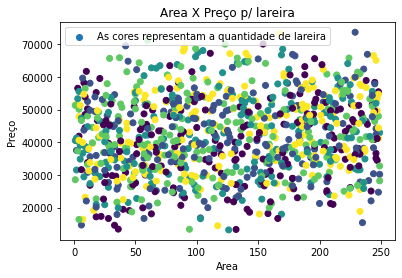

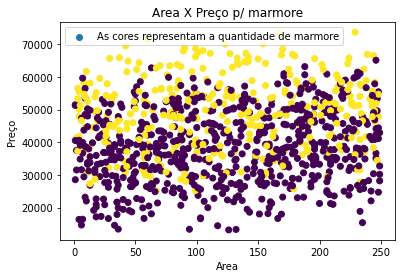

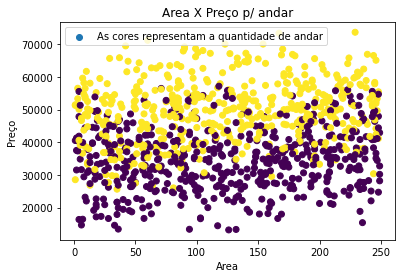

In [25]:
for col in list(df.drop(columns=['preco', 'area']).columns):
    fig, ax = plt.subplots()
    ax.scatter(x='area', y='preco', data=df, c=col)
    ax.set_title(f'Area X Preço p/ {col}')
    ax.set_ylabel('Preço')
    ax.set_xlabel('Area')
    ax.legend([f'As cores representam a quantidade de {col}'], loc=2)
    plt.show()

* Analise (Lareira, Garagem e Banheiro):
    - Não é possivel encontrar nenhuma linearidade.
* Analise (Marmore e Andar):
    - Quando há tanto marmore quanto andar, os preços são maiores. Já em relação a area, não há padrões.


---

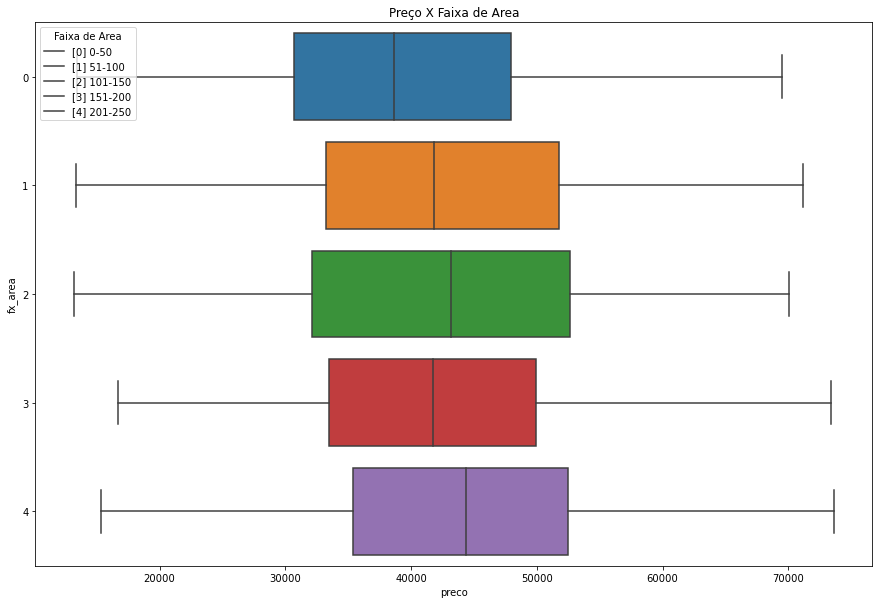

In [26]:
#-------------------------------
# Cada faixa representa 1/5 (50)
# da area total (250).
#------------------------------

bins = list(range(0,260, 50))
labels = list(range(0, 5))
df['fx_area'] = pd.cut(x = df.area,
                                bins = bins,
                                labels = labels,
                                include_lowest = True)

ax = sns.boxplot(x='preco', y='fx_area', data=df,)
ax.set_title('Preço X Faixa de Area')
ax.legend(['0-50', '51-100', '101-150', '151-200', '201-250'])
ax.legend(['[0] 0-50', '[1] 51-100', '[2] 101-150', '[3] 151-200', '[4] 201-250'], title='Faixa de Area', loc=2)

ax.figure.set_size_inches(15, 10)
plt.show()

É possivel notar uma crescente nos valores da mediana por classe

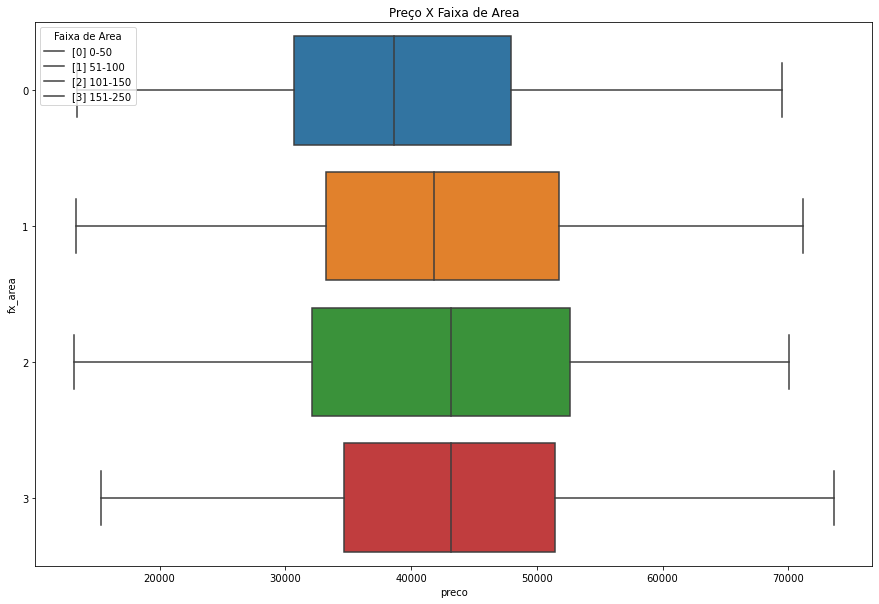

In [27]:
# classe 3 representa 2/5 (100)
df['fx_area'].replace(4, 3, inplace=True)

ax = sns.boxplot(x='preco', y='fx_area', data=df,)
ax.set_title('Preço X Faixa de Area')
ax.legend(['[0] 0-50', '[1] 51-100', '[2] 101-150', '[3] 151-250'], title='Faixa de Area', loc=2)
ax.figure.set_size_inches(15, 10)
plt.show()

- A classe 4 foi juntada com a classe 3 para que o padrão da mediana fosse mais visivel.

---

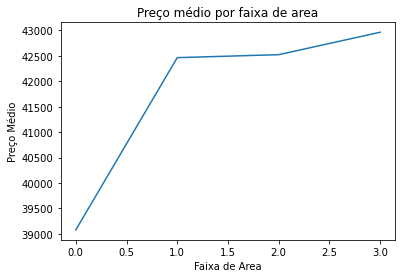

In [28]:
list_preco_medio = []
for index in list(range(0, 4)):
    list_preco_medio.append(df.query(f'fx_area == {index}')['preco'].mean())
    
df_graph = pd.DataFrame()
df_graph['pr_md_preco'] = list_preco_medio
df_graph['fx_area'] = list(range(0, 4))

fig, ax = plt.subplots()
ax.plot(df_graph['fx_area'], df_graph['pr_md_preco'])
ax.set_title('Preço médio por faixa de area')
ax.set_ylabel('Preço Médio')
ax.set_xlabel('Faixa de Area')
plt.show()

- É notado que a subida da mediana entre as classes é acompanhado pelo os valores da média também 

## Garagem

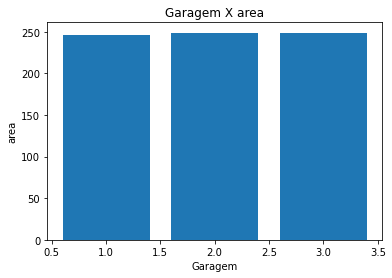

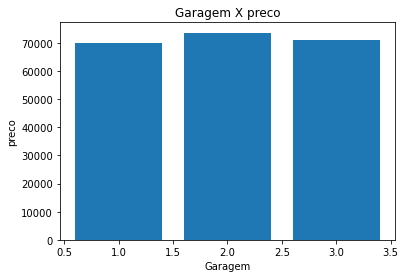

In [29]:
for col in ['area', 'preco']:
    fig, ax = plt.subplots()
    ax.bar(x='garagem', height=col, data=df)
    ax.set_title(f'Garagem X {col}')
    ax.set_ylabel(col)
    ax.set_xlabel('Garagem')
    plt.show()

- Não é possivel identificar padrões no grafico

---

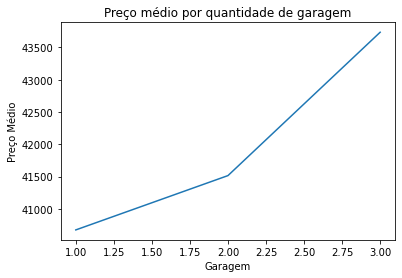

In [30]:
list_preco_medio = []
for index in list(range(0, 4)):
    list_preco_medio.append(df.query(f'garagem == {index}')['preco'].mean())
    
df_graph = pd.DataFrame()
df_graph['pr_md'] = list_preco_medio
df_graph['garagem'] = list(range(0, 4))

fig, ax = plt.subplots()
plt.plot(df_graph['garagem'], df_graph['pr_md'])
ax.set_title('Preço médio por quantidade de garagem')
ax.set_ylabel('Preço Médio')
ax.set_xlabel('Garagem')
plt.show()


- Há uma crescente na média dos preços por quantidade de garagem.

---

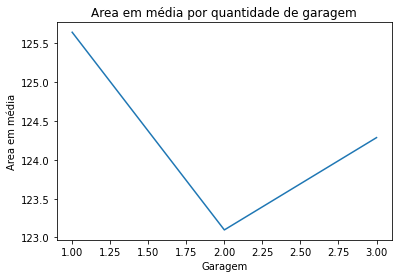

In [31]:
list_area_medio = []
for index in list(range(0, 4)):
    list_area_medio.append(df.query(f'garagem == {index}')['area'].mean())
    
df_graph = pd.DataFrame()
df_graph['area_md'] = list_area_medio
df_graph['garagem'] = list(range(0, 4))

fig, ax = plt.subplots()
plt.plot(df_graph['garagem'], df_graph['area_md'])
ax.set_title('Area em média por quantidade de garagem')
ax.set_ylabel('Area em média')
ax.set_xlabel('Garagem')
plt.show()

* Não há uma linearidade

## Lareira

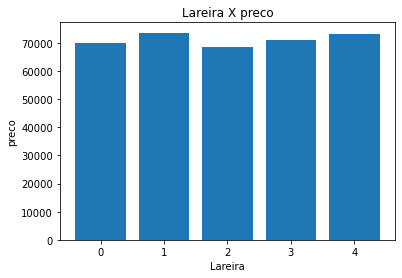

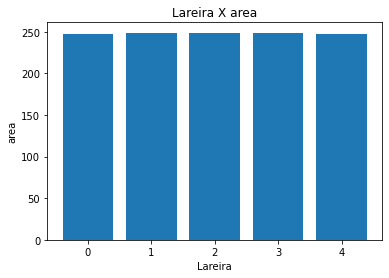

In [32]:
for col in ['preco', 'area']:
    fig, ax = plt.subplots()
    ax.bar(x='lareira', height=col, data=df)
    ax.set_title(f'Lareira X {col}')
    ax.set_ylabel(col)
    ax.set_xlabel('Lareira')
    plt.show()

- Não é possivel notar padrões no grafico

---

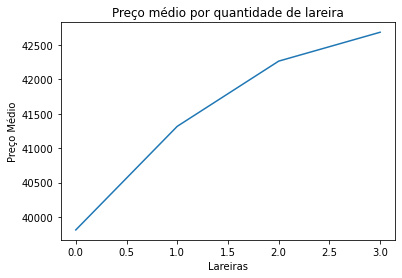

In [33]:
list_preco_medio = []
for index in list(range(0, 4)):
    list_preco_medio.append(df.query(f'lareira == {index}')['preco'].mean())
    
df_graph = pd.DataFrame()
df_graph['pr_md'] = list_preco_medio
df_graph['lareira'] = list(range(0, 4))

fig, ax = plt.subplots()
plt.plot(df_graph['lareira'], df_graph['pr_md'])
ax.set_title('Preço médio por quantidade de lareira')
ax.set_ylabel('Preço Médio')
ax.set_xlabel('Lareiras')
plt.show()

- Há uma crescente na média dos preços por quantidade de lareira.

---

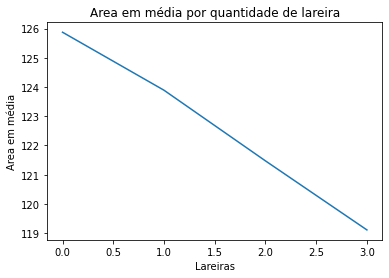

In [34]:
list_area_medio = []
for index in list(range(0, 4)):
    list_area_medio.append(df.query(f'lareira == {index}')['area'].mean())
    
df_graph = pd.DataFrame()
df_graph['area_md'] = list_area_medio
df_graph['lareira'] = list(range(0, 4))

fig, ax = plt.subplots()
plt.plot(df_graph['lareira'], df_graph['area_md'])
ax.set_title('Area em média por quantidade de lareira')
ax.set_ylabel('Area em média')
ax.set_xlabel('Lareiras')
plt.show()

* Quanto mais lareira menor a area em média

## Banheiro

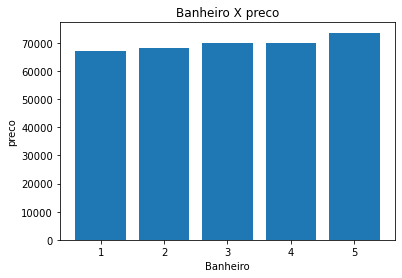

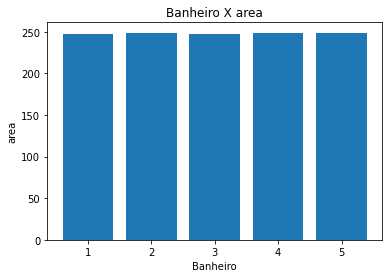

In [35]:
for col in ['preco', 'area']:
    fig, ax = plt.subplots()
    ax.bar('banheiro', height=col, data=df)
    ax.set_title(f'Banheiro X {col}')
    ax.set_ylabel(col)
    ax.set_xlabel('Banheiro')
    plt.show()

- Há uma crescente nos valores mais altos por quantidade de banheiro quando comparamos com o preço.

---

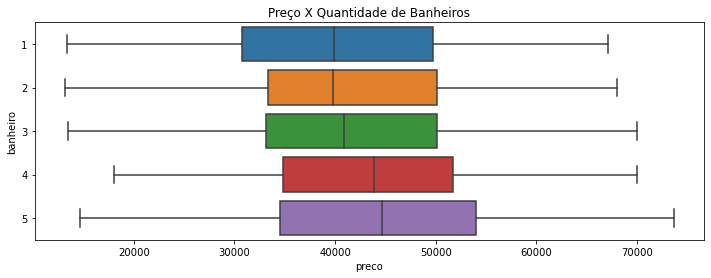

In [36]:
ax = sns.boxplot(x='preco', y='banheiro', data=df, orient='h')
ax.set_title('Preço X Quantidade de Banheiros')
ax.figure.set_size_inches(12, 4)
plt.show()

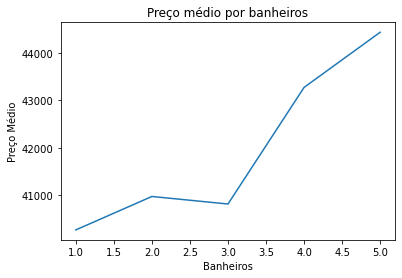

In [37]:
list_preco_medio = []
for index in list(range(0, 6)):
    list_preco_medio.append(df.query(f'banheiro == {index}')['preco'].mean())
    
df_graph = pd.DataFrame()
df_graph['pr_md'] = list_preco_medio
df_graph['banheiro'] = list(range(0, 6))

fig, ax = plt.subplots()
plt.plot(df_graph['banheiro'], df_graph['pr_md'])
ax.set_title('Preço médio por banheiros')
ax.set_ylabel('Preço Médio')
ax.set_xlabel('Banheiros')
plt.show()

- Há uma crescente na média dos preços por quantidade de banheiros.

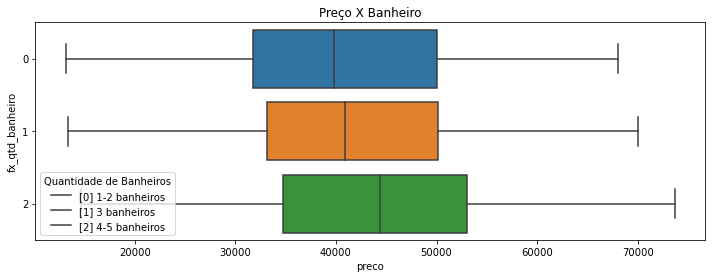

In [38]:
labels = [0,1,2]
df['fx_qtd_banheiro'] = pd.cut(x = df.banheiro,
                                bins = [1,2,3,5],
                                labels = labels,
                                include_lowest = True)

ax = sns.boxplot(x='preco', y='fx_qtd_banheiro', data=df, orient='h')
ax.set_title('Preço X Banheiro')
ax.legend(['[0] 1-2 banheiros', '[1] 3 banheiros', '[2] 4-5 banheiros'], title='Quantidade de Banheiros', loc=3)
ax.figure.set_size_inches(12, 4)
plt.show()

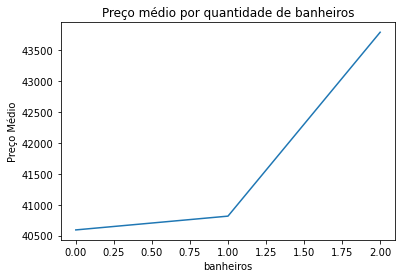

In [39]:
list_preco_medio = []
for index in list(range(0, 3)):
    list_preco_medio.append(df.query(f'fx_qtd_banheiro == {index}')['preco'].mean())
    
df_graph = pd.DataFrame()
df_graph['pr_md'] = list_preco_medio
df_graph['fx_qtd_banheiro'] = list(range(0, 3))

fig, ax = plt.subplots()
plt.plot(df_graph['fx_qtd_banheiro'], df_graph['pr_md'])
ax.set_title('Preço médio por quantidade de banheiros')
ax.set_ylabel('Preço Médio')
ax.set_xlabel('banheiros')
plt.show()

- Foi agrupado algumas classes para a que crescente positiva possa ser mais visivel

---

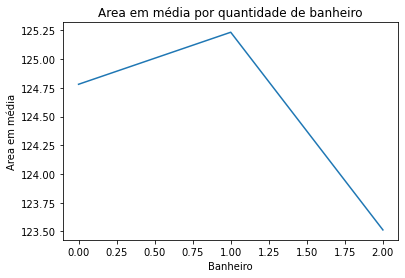

In [40]:
list_area_medio = []
for index in list(range(0, 3)):
    list_area_medio.append(df.query(f'fx_qtd_banheiro == {index}')['area'].mean())
    
df_graph = pd.DataFrame()
df_graph['area_md'] = list_area_medio
df_graph['fx_qtd_banheiro'] = list(range(0, 3))

fig, ax = plt.subplots()
plt.plot(df_graph['fx_qtd_banheiro'], df_graph['area_md'])
ax.set_title('Area em média por quantidade de banheiro')
ax.set_ylabel('Area em média')
ax.set_xlabel('Banheiro')
plt.show()

* Não há uma linearidade

# Pré Processamento dos Dados

In [41]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['preco', 'area', 'banheiro'])
y = df['preco']

norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

SEED = 123
np.random.seed(SEED)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

# Modelando

## Regressão Linear

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

---

In [43]:
df_lr = pd.DataFrame(data = {'Coef':lr.coef_.round(2)},
                     index = list(X.columns) )
df_lr.rename_axis('Variaveis', axis = 'columns', inplace = True)
df_lr

Variaveis,Coef
garagem,3295.36
lareira,2204.85
marmore,11390.89
andar,16032.56
fx_area,3706.55
fx_qtd_banheiro,3274.13


---

In [44]:
print(f'"Linear_Regressor.intercept_" = {lr.intercept_.round(2)}')
print('É o nosso valor constante de preço, independentemente das outras variaveis.')

"Linear_Regressor.intercept_" = 24019.69
É o nosso valor constante de preço, independentemente das outras variaveis.


## KNN

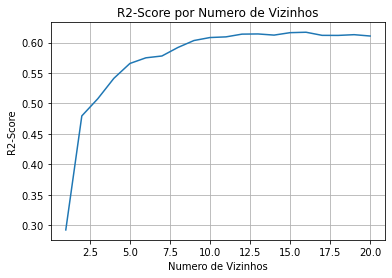

In [45]:
r2_list=[]
for nn in list(range(1,21)):
    kn = KNeighborsRegressor(n_neighbors=nn)
    kn.fit(X_train, y_train)
    y_pred_kn = kn.predict(X_test)
    
    score_r2=r2(y_test, y_pred_kn).round(4)
    r2_list.append(score_r2)

df_graph = pd.DataFrame()
df_graph['R2-Score']= r2_list
df_graph['N_vizinhos']=list(range(1,21))
    
fig, ax = plt.subplots()
plt.plot(df_graph['N_vizinhos'], df_graph['R2-Score'])
ax.grid()
ax.set_title('R2-Score por Numero de Vizinhos')
ax.set_ylabel('R2-Score')
ax.set_xlabel('Numero de Vizinhos')
plt.show()

In [46]:
df_graph.query('N_vizinhos > 10')

,R2-Score,N_vizinhos
10,0.6094,11
11,0.6139,12
12,0.6142,13
13,0.6123,14
14,0.6163,15
15,0.6170,16
16,0.6119,17
17,0.6118,18
18,0.6130,19
19,0.6108,20


O R2-Score fica "constante" após 11° vizinhos, chegando a marca de 61.39%.

In [47]:
kn = KNeighborsRegressor(n_neighbors=11)
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)

## Decision Tree

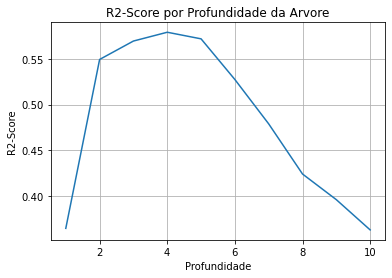

In [48]:
dtr_list=[]
for depth in list(range(1,11)):
    dtr = DecisionTreeRegressor(max_depth=depth)
    dtr.fit(X_train, y_train)
    y_pred_dtr = dtr.predict(X_test)
    
    score_r2=r2(y_test, y_pred_dtr).round(4)
    dtr_list.append(score_r2)

df_graph = pd.DataFrame()
df_graph['R2-Score']= dtr_list
df_graph['Profundidade']=list(range(1,11))
    
fig, ax = plt.subplots()
plt.plot(df_graph['Profundidade'], df_graph['R2-Score'])
ax.grid()
ax.set_title('R2-Score por Profundidade da Arvore')
ax.set_ylabel('R2-Score')
ax.set_xlabel('Profundidade')
plt.show()

In [49]:
df_graph.query('Profundidade <= 6')

,R2-Score,Profundidade
0,0.3649,1
1,0.5492,2
2,0.5693,3
3,0.5789,4
4,0.5717,5
5,0.5273,6


O R2-Score chega ao seu limite na profundidade 4, chegando a 57.89% de R2-Score.

In [50]:
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

# Avaliando os Modelos

In [51]:
def avaliando_modelo(y_test, y_pred, model):    
    print(f'{model} ------------------')
    print(f'R²Score: {r2(y_test, y_pred) * 100:.4f}%')
    MAE = mean_absolute_error(y_test,y_pred)
    print(f'Erro Médio Absoluto: {MAE:.4f}')
    RMSE = mean_squared_error(y_test,y_pred,squared=False) 
    print(f'Raiz do erro quadrático médio: {RMSE:.4f}')

---

In [52]:
avaliando_modelo(y_test, y_pred_lr, 'Linear Regressor')

Linear Regressor ------------------
R²Score: 62.4044%
Erro Médio Absoluto: 6296.3862
Raiz do erro quadrático médio: 7482.9139


O modelo de regressão linear explica 62% da variação na nossa variavel dependente. E temos 7482.91 de variação em média nas nossa predições.

---

In [53]:
avaliando_modelo(y_test, y_pred_kn, 'KNN')

KNN ------------------
R²Score: 60.9382%
Erro Médio Absoluto: 6398.5833
Raiz do erro quadrático médio: 7627.4296


O modelo de KNN explica 60% da variação na nossa variavel dependente. E temos 7627.42 de variação em média nas nossa predições.

---

In [54]:
avaliando_modelo(y_test, y_pred_dtr, 'Decision Tree Regressor')

Decision Tree Regressor ------------------
R²Score: 57.1693%
Erro Médio Absoluto: 6609.0412
Raiz do erro quadrático médio: 7986.9329


O modelo de Decision Tree Regressor explica 57% da variação na nossa variavel dependente. E temos 7986.93 de variação em média nas nossa predições.

---

# Conclusão

As melhores métricas são do modelo de Regressão Linear. Pois o modelo possui a menor variância nas predições, e é o que mais explica a nossa variavel dependente.